# Best regression score by DT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1hYZIk005bo2uWuf_ZbTAdiii0lqqVUIl
!gdown 1XYG3y85Y-VBTskrd7x37laWgOYuvrj_s

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1hYZIk005bo2uWuf_ZbTAdiii0lqqVUIl
To: /content/energy-train-l.csv
100% 47.0k/47.0k [00:00<00:00, 62.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XYG3y85Y-VBTskrd7x37laWgOYuvrj_s
To: /content/energy-test-l.csv
100% 11.8k/11.8k [00:00<00:00, 25.1MB/s]


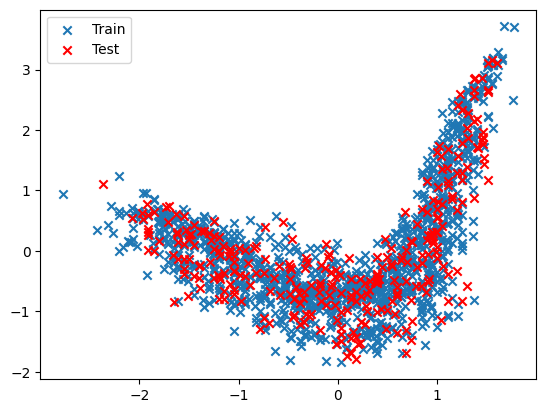

In [3]:
df = pd.read_csv('/content/energy-train-l.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('/content/energy-test-l.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')

plt.legend(['Train', 'Test']);

Best parameters: {'ccp_alpha': 0.0, 'max_depth': 5}
Best cross-validation score: 0.695950578573266
Train score: 0.7378325957198344
Test score: 0.6472409455018961


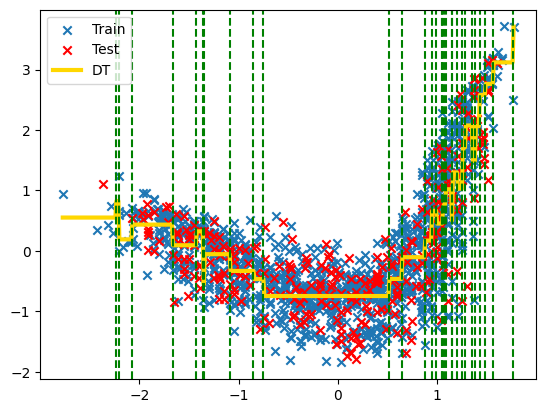

In [9]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
}

# Grid search for best parameters
reg = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Best parameters and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Refit with best parameters
best_reg = grid_search.best_estimator_
train_score = best_reg.score(x_train, y_train)
test_score = best_reg.score(x_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

# Generate data points for plotting
xp = np.arange(x_train.min(), x_train.max(), 0.01)[:, np.newaxis]
yp = best_reg.predict(xp)

# Plotting the regression results
plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')
plt.plot(xp, yp, color='gold', linewidth=3)
plt.legend(['Train', 'Test', 'DT'])


# Add vertical lines for decision boundaries
n_nodes = best_reg.tree_.node_count
children_left = best_reg.tree_.children_left
children_right = best_reg.tree_.children_right
threshold = best_reg.tree_.threshold

# Loop through the nodes to get the decision boundaries
for i in range(n_nodes):
    if children_left[i] != children_right[i]:
        plt.axvline(x=threshold[i], color='green', linestyle='--')

plt.show()

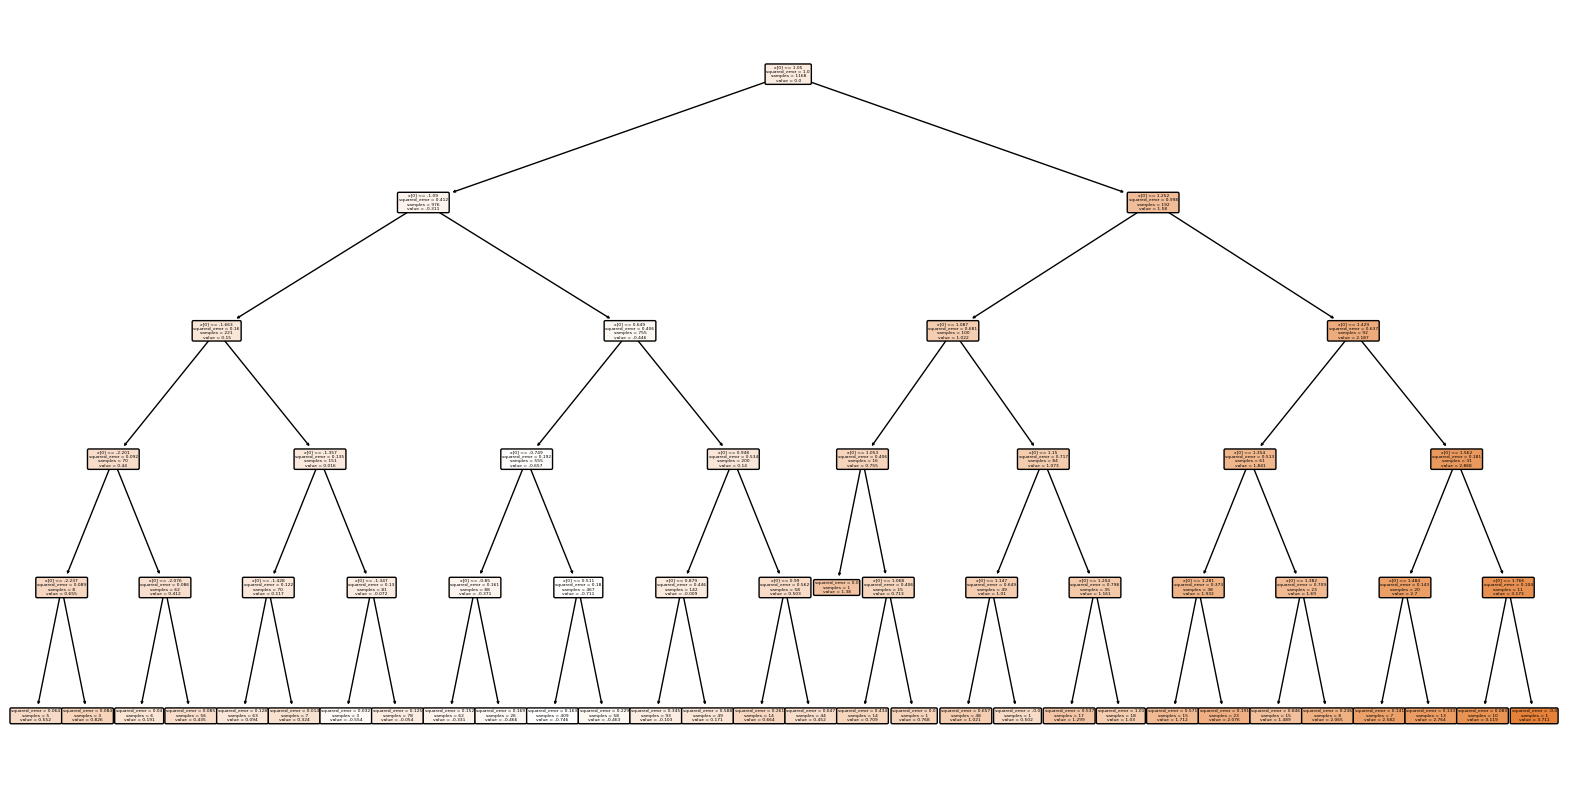

In [5]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(best_reg,
               filled=True,
               rounded=True,
               class_names=['Target'])
plt.show()

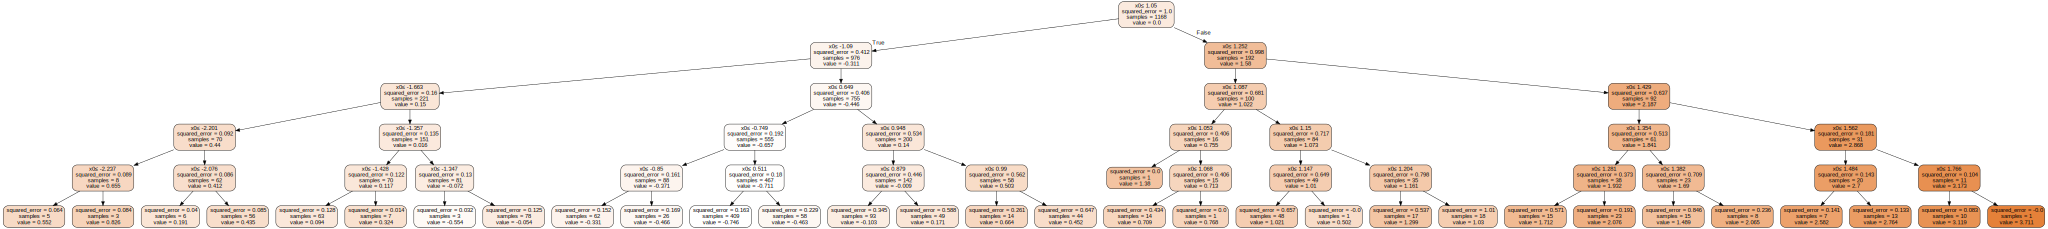

In [6]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(best_reg,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           class_names=['Target'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

# SVC support vctors

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

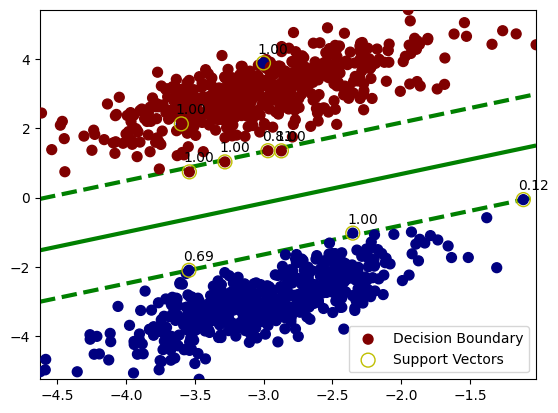

In [25]:
# Generate the dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

model = SVC(C=1., kernel='linear', probability=True)
model.fit(X, y)

# Get the support vectors and their alpha values
support_vectors = model.support_vectors_
alphas = np.abs(model.dual_coef_[0])

# Plotting the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

# Plotting the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], zorder=4, c='none', s=100, edgecolors='y')

# Annotate each support vector with its alpha value
for i, (sv, alpha) in enumerate(zip(support_vectors, alphas)):
    plt.annotate(f'{alpha:.2f}', (sv[0], sv[1]), textcoords="offset points", xytext=(7,7), ha='center')

plt.legend(['Decision Boundary', 'Support Vectors'])
plt.show()


# Clustering on NNIST

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/100
469/469 [==============================] - 24s 7ms/step - loss: 180.6661 - val_loss: 162.8969
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 161.2284 - val_loss: 156.9617
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 156.6422 - val_loss: 152.0484
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 154.2551 - val_loss: 151.6520
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 152.5461 - val_loss: 148.6150
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 151.4783 - val_loss: 149.3100
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 150.7814 - val_loss: 147.5827
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 150.0483 - val_loss: 147.2326
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 149.7004 - val_loss

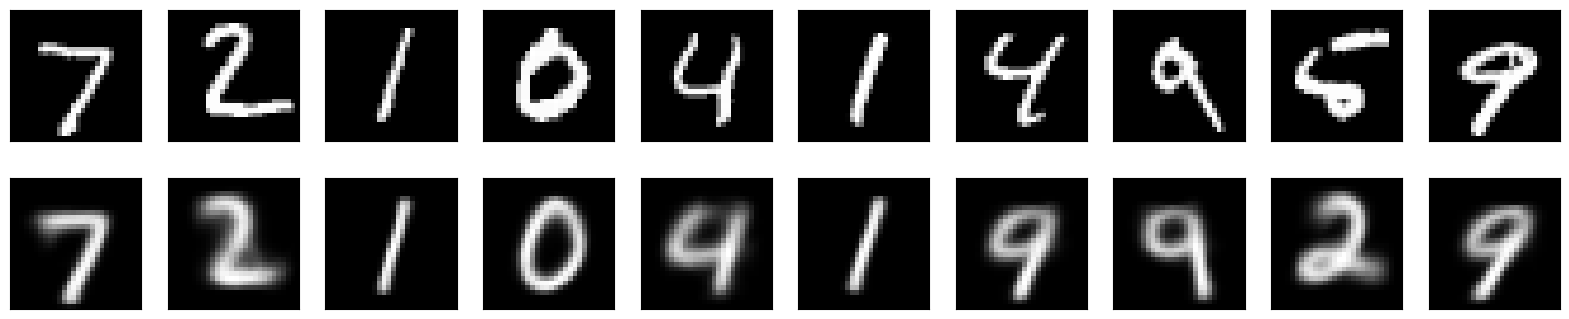

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


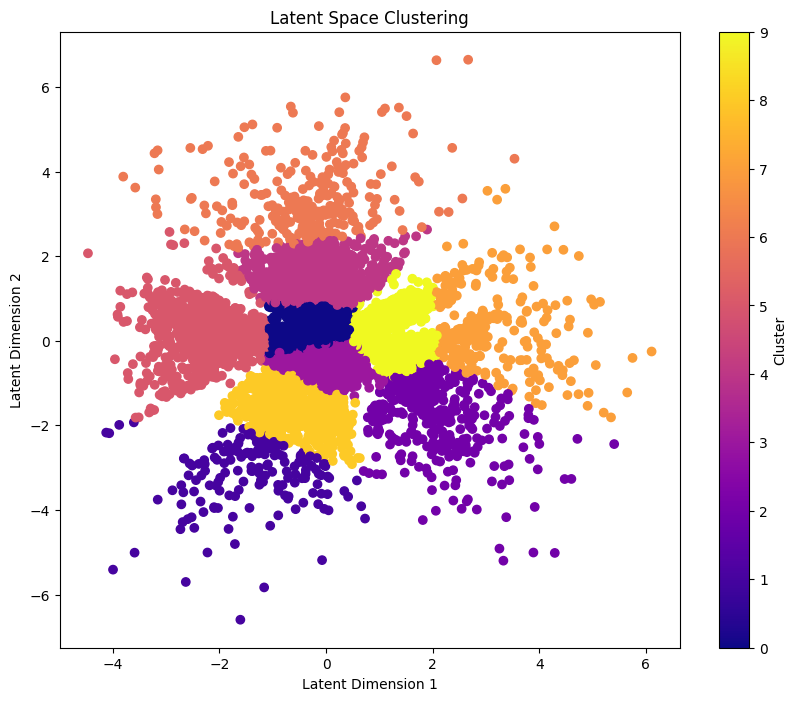

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Parameters
original_dim = 784 #28*28
intermediate_dim = 512 #encoder v decoder
latent_dim = 2
batch_size = 128
epochs = 100
learning_rate = 0.002

def build_encoder(latent_dim, intermediate_dim):
    inputs = Input(shape=(28, 28, 1))
    x = Flatten()(inputs)
    x = Dense(intermediate_dim, activation='relu')(x)
    x = Dropout(0.2)(x)  # Dropout layer for regularization
    x = Dense(intermediate_dim // 2, activation='relu')(x)  # Additional layer
    x = Dropout(0.2)(x)  # Additional dropout layer for regularization
    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)
    z = Lambda(reparameterization)([z_mean, z_log_var])
    return Model(inputs, [z_mean, z_log_var, z], name='encoder')

def reparameterization(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Instantiate encoder
encoder = build_encoder(latent_dim, intermediate_dim)

# Define the decoder network with more layers
def build_decoder(latent_dim, intermediate_dim, original_dim):
    latent_inputs = Input(shape=(latent_dim,))
    x = Dense(intermediate_dim // 2, activation='relu')(latent_inputs)
    x = Dense(intermediate_dim, activation='relu')(x)
    x = Dense(original_dim, activation='sigmoid')(x)
    outputs = Reshape((28, 28, 1))(x)
    return Model(latent_inputs, outputs, name='decoder')

decoder = build_decoder(latent_dim, intermediate_dim, original_dim)
inputs = Input(shape=(28, 28, 1))
z_mean, z_log_var, z = encoder(inputs)
outputs = decoder(z)
vae = Model(inputs, outputs, name='vae_mlp')
reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(outputs)) * original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1) * -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

# Compile the VAE with the specified learning rate
vae.compile(optimizer=Adam(learning_rate=learning_rate))
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

def plot_images(original_imgs, reconstructed_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Assuming x_test contains the original images and vae is your trained model
reconstructed_imgs = vae.predict(x_test)
plot_images(x_test, reconstructed_imgs)

# Extract latent space representations
z_mean, _, _ = encoder.predict(x_test)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10)
y_pred = kmeans.fit_predict(z_mean)

# Plot the clustered data in latent space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_pred, cmap='plasma')  # Changed colormap to 'plasma'
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Clustering')
plt.show()


In [5]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(z_mean, y_pred)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.34401553869247437


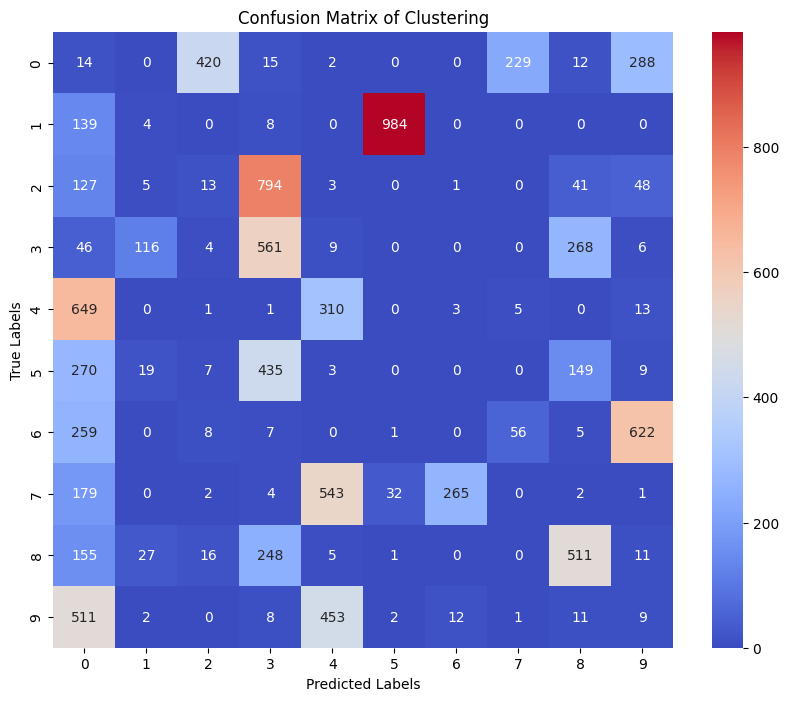

In [3]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Clustering')
plt.show()
